# Building an Image Classifier using Keras and TensorFlow
### Don't forget to run the following commands in order to import the proper libraries
### You may also need to be in a separate environment in order to run TensorFlow

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as od
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#Conda commands for installing tensorflow, pip, and keras if you don't already have them
#conda install tensorflow
#conda install pip
#pip install --upgrade tensorflow==2.0.0-rc1

#Importing keras and tensorlow and checking the versions
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


## We will be using the famous Fashion MNIST dataset in order to learn how image classification works
### The dataset contains roughly 70,000 images of fashion items such as t-shirts, pants, shoes, etc. and the goal is to train a model to accurately classify each image

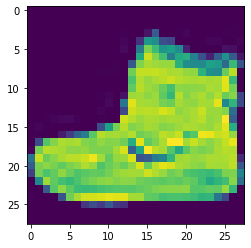

In [2]:
#Loading the data into tuples
#The first tuple contains training data for both the images and labels while the second tuple contains testing data
fashionData = keras.datasets.fashion_mnist
(imageTrain, labelTrain), (imageTest, labelTest) = fashionData.load_data()

#Showing an example of what the first image looks like
plt.imshow(imageTrain[0])

In [3]:
#To view the label of an image, we follow a similar approach
#Each number represents a given category: 0 - T-Shirt/Top, 1 - Trouser, and so forth.
labelTrain[0]

#As you can see, the label for a boot is 9

9

In [4]:
#Numbers aren't very useful so we'll add class names to the data to make it easier to read
classNames = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]

#So now, I can directly access items based on their classname
classNames[labelTrain[0]]

'Boot'

In [5]:
#For CNN's we need to preprocess the data to be in a 3D array, unlike ANN's which just require a 1D array
#We'll do 60000 records for training and 10000 for testing
imageTrain = imageTrain.reshape((60000, 28, 28, 1)) #1 is the "channel" dimension we're adding
imageTest = imageTest.reshape((10000, 28, 28, 1))

#To normalize our data, we will convert it all to the same scale
imageTrainNormalized = imageTrain / 255.0 #This restricts the pixel value to be between 0 and 1
imageTestNormalized = imageTest / 255.0

#Since we know the data is only from 0 to 255, we can do this to normalize it.
#In typical machine learning normalization processes, we would subtract each number by the mean and divide by the
#standard deviation

In [6]:
#When we loaded the data earlier, we had 60,000 images for training and 10,000 for testing.
#Now, we further split the training data into training/validation sets in order to tune our hyperparameters

#Splitting the image data and label data into training/validation sets by choosing the first 5000 as the validation set
#and the rest for training
imageTrain, imageValidation = imageTrainNormalized[5000:], imageTrainNormalized[:5000]
labelTrain, labelValidation = labelTrain[5000:], labelTrain[:5000]
imageTest = imageTestNormalized

#Showing what our new data looks like
imageTrain[0]

#You can now see that the values are all between 0 and 1

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.17254902],
        [0.49803922],
        [0.71372549],
        [0.7254902 ],
        [0.63137255],
        [0.47058824],
        

### CNN Architecture
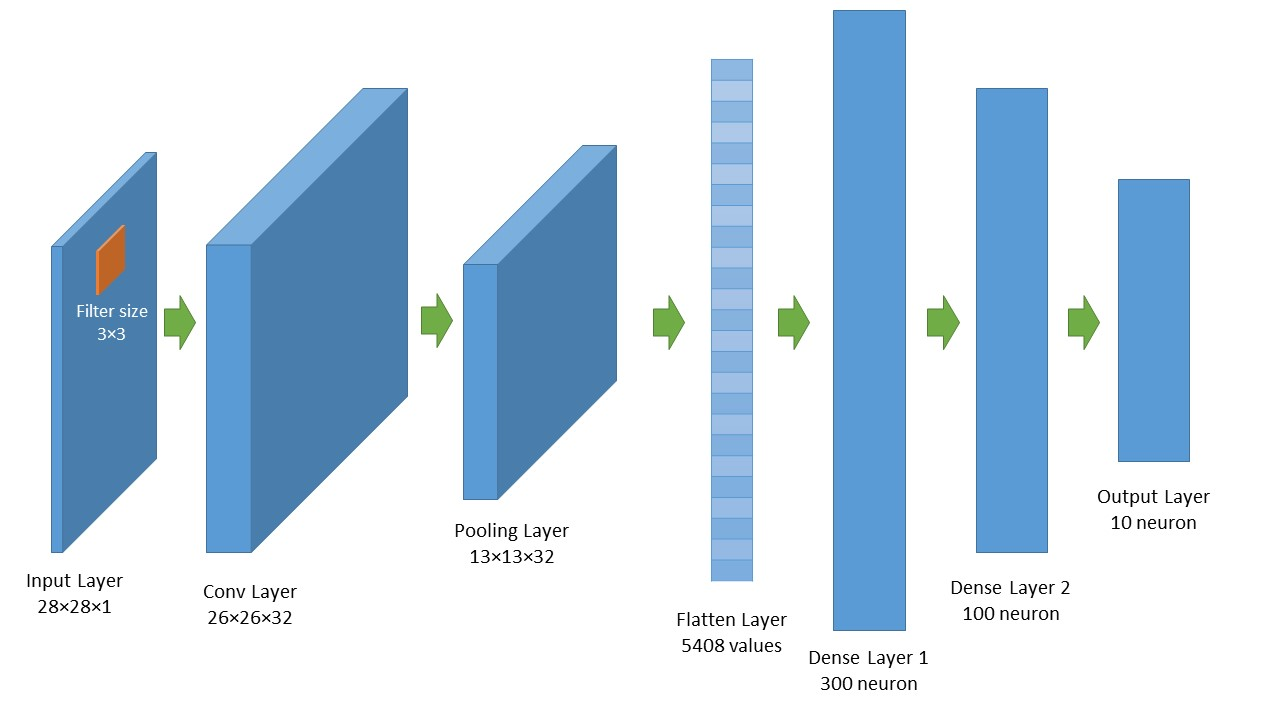

In [8]:
#The code for creating a CNN model is very similar to a typical ANN but we just add a few extra convolutional steps

#There are two types of API's in Keras to create models: Sequential and Functional
#For simple neural networks, sequential is the most straight forward

model = keras.models.Sequential()

#Now we will specify our convolutional and pooling layer dimensions
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu',
                              input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
          
#Now we'll add the input layer, a couple hidden layers, and then the output layer
#The input layer is a 28x28 array and we want the output to be one of 10 answers (clothing categories)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation = "relu")) #Relu is the preferred activation method for classification
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax")) #Softmax is the preferred activation method for 
                                                          #classification with mutually exclusive categories
          
#Printing a summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [9]:
#We'll now compile our model to specify our loss function, the optimizer, and what metrics to use
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])
#We use that specific loss function since we have labels for our categories
#SGD is a form of gradient descent and this tells our model to use back-propagation

#Next, we fit our model using the image and label training data (this could take a while based on your epoch value)
modelHistory = model.fit(imageTrain, labelTrain, epochs = 10, batch_size = 64, 
                         validation_data = (imageValidation, labelValidation))

Epoch 1/10
860/860 [==============================] - 25s 29ms/step - loss: 0.8457 - accuracy: 0.7149 - val_loss: 0.6853 - val_accuracy: 0.7618
Epoch 2/10
860/860 [==============================] - 24s 28ms/step - loss: 0.5438 - accuracy: 0.8026 - val_loss: 0.4851 - val_accuracy: 0.8236
Epoch 3/10
860/860 [==============================] - 25s 29ms/step - loss: 0.4836 - accuracy: 0.8262 - val_loss: 0.5443 - val_accuracy: 0.7852
Epoch 4/10
860/860 [==============================] - 24s 28ms/step - loss: 0.4481 - accuracy: 0.8403 - val_loss: 0.4308 - val_accuracy: 0.8462
Epoch 5/10
860/860 [==============================] - 23s 27ms/step - loss: 0.4237 - accuracy: 0.8481 - val_loss: 0.3953 - val_accuracy: 0.8612
Epoch 6/10
860/860 [==============================] - 26s 30ms/step - loss: 0.4031 - accuracy: 0.8565 - val_loss: 0.4218 - val_accuracy: 0.8452
Epoch 7/10
860/860 [==============================] - 25s 29ms/step - loss: 0.3837 - accuracy: 0.8623 - val_loss: 0.4892 - val_accuracy:

## Once the model has been compiled and ran, it's now time to evaluate how it performed.
### To increase accuracy, improve the epoch's or add more conv layers.
### We will also show how to make predictions using our model.

In [10]:
#To evaluate our model, we simply use the evaluate function along with our test set to compare 
model.evaluate(imageTest, labelTest)

#The first number is the loss and the second number is the accuracy

313/313 [==============================] - 2s 7ms/step - loss: 0.3717 - accuracy: 0.8657


[0.37166401743888855, 0.8657000064849854]

In [11]:
#To make predictions of what category an image will fall in based on it's characteristics, we'll just take a sample
#of the data and use the predict function
imageSampleSet = imageTest[:3]

#First, we'll find out the probabibility that the image belongs to each class
classProbability = model.predict(imageSampleSet)
classProbability.round(2)

#As you can see, for the first image, it's 99% sure it's the 10th class (or a boot). And in the next samlple,
#it's certain that it belongs to the 3rd class (or a Pullover) and so on.

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.2 , 0.01, 0.75],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [12]:
#To just only predict what class the image belongs to, we use the predict_classes function
classPrediction = model.predict_classes(imageSampleSet)
classPrediction

#As you can see, it chose 9, 2, and 1 (if you go back up to the array at the beginning of this, you can see what each
#number corresponds to)
#Also, don't forget arrays start at 0, so 9 actually is the 10th item in the set

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [13]:
#To make things more obvious, we'll just use the classNames variable we created earlier
np.array(classNames)[classPrediction]

array(['Boot', 'Pullover', 'Trouser'], dtype='<U11')

### CNN's aren't any better than a typical neural network if you're using simple images like the ones in this dataset.
### The benefits really come in when you have images with multiple channels (such as RGB) and larger images.